In [1]:
import pandas as pd
import numpy as np 
import nltk
from collections import Counter
from nltk.corpus import stopwords
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.optimize import minimize
import xgboost as xgb
from sklearn.cross_validation import train_test_split
import multiprocessing
import difflib

/home/takaya/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
features = [
    'z_noun_match',
    'z_len1',
    'z_len2',
    'z_word_len1',
    'z_word_len2',
    'z_match_ratio',
    'z_word_match',
    'z_word_match_idf',
    'z_tfidf_sum1',
    'z_tfidf_sum2',
    'z_tfidf_mean1',
    'z_tfidf_mean2',
    'z_tfidf_len1',
    'z_tfidf_len2',
    'z_n_sim',
    
    'common_words_lemm',
    'n_sim_lemm',
    'n_sim_lemm_stop',
    's2v_sum_dist',
    's2v_ave_dist',
    
    'sum_prob_weight_common_words',
    'sum_prob_weight_uncommon_words',

    'top_similarity',
    'min_sim',
    'max_sim',
    
    'common_bigrams_clean_lemm',
    'jaccard_common_bigrams_clean_lemm',
    'nazo_common_bigrams_clean_lemm',
    
    'sum_weight_common_bigrams',
    'sum_weight_common_bigrams_limit3',
    
    'common_ngrams_clean_lemm',
    'jaccard_common_ngrams_clean_lemm',
    'nazo_common_ngrams_clean_lemm',
    
    'clean_lemm_wmd',
    
    'bleu_clean_lemm_stem_q1q2',
    'bleu_clean_lemm_stem_q2q1',
    'bleu_clean_lemm_q1q2',
    'bleu_clean_lemm_q2q1',
    
    'norm_sum_prob_weight_common_words',
    
    'sum_prob_weight_common_words_thresh_0.20',
    'sum_prob_weight_common_words_thresh_0.30',
    'sum_prob_weight_common_words_thresh_0.40',
    'sum_prob_weight_common_words_thresh_0.50',
    'sum_prob_weight_common_words_thresh_0.60',
    'sum_prob_weight_common_words_thresh_0.70',
    'sum_prob_weight_common_words_thresh_0.80',
    'sum_prob_weight_common_words_thresh_0.90',
    'sum_prob_weight_common_words_thresh_0.95',
    'sum_prob_weight_uncommon_words_thresh_0.20',
    'sum_prob_weight_uncommon_words_thresh_0.30',
    'sum_prob_weight_uncommon_words_thresh_0.40',
    'sum_prob_weight_uncommon_words_thresh_0.50',
    'sum_prob_weight_uncommon_words_thresh_0.60',
    'sum_prob_weight_uncommon_words_thresh_0.70',
    'sum_prob_weight_uncommon_words_thresh_0.80',
    'sum_prob_weight_uncommon_words_thresh_0.90',
    'sum_prob_weight_uncommon_words_thresh_0.95',
    
    'sum_prob_weight_common_words_spacy_thresh_0.20',
    'sum_prob_weight_common_words_spacy_thresh_0.30',
    'sum_prob_weight_common_words_spacy_thresh_0.40',
    'sum_prob_weight_common_words_spacy_thresh_0.50',
    'sum_prob_weight_common_words_spacy_thresh_0.60',
    'sum_prob_weight_common_words_spacy_thresh_0.70',
    'sum_prob_weight_common_words_spacy_thresh_0.80',
    'sum_prob_weight_common_words_spacy_thresh_0.90',
    'sum_prob_weight_common_words_spacy_thresh_0.95',
    'sum_prob_weight_uncommon_words_spacy_thresh_0.20',
    'sum_prob_weight_uncommon_words_spacy_thresh_0.30',
    'sum_prob_weight_uncommon_words_spacy_thresh_0.40',
    'sum_prob_weight_uncommon_words_spacy_thresh_0.50',
    'sum_prob_weight_uncommon_words_spacy_thresh_0.60',
    'sum_prob_weight_uncommon_words_spacy_thresh_0.70',
    'sum_prob_weight_uncommon_words_spacy_thresh_0.80',
    'sum_prob_weight_uncommon_words_spacy_thresh_0.90',
    'sum_prob_weight_uncommon_words_spacy_thresh_0.95',
    
    'n_sim_lemm_spacy',
    'n_sim_lemm_stop_spacy',
    
#     'q1_hash', 'q2_hash', 
    'q1_freq', 'q2_freq',
    
    'q1_words_not_in_word2vec',
    'q2_words_not_in_word2vec',
    
    'uncommon_not_in_word2vec',
    
    'fm',
    'fm_2grams',
]

In [3]:
features_6w1h = [
#     'q1_what',
#     'q2_what',
#     'q1_when',
#     'q2_when',
#     'q1_why',
#     'q2_why',
#     'q1_where',
#     'q2_where',
#     'q1_who',
#     'q2_who',
#     'q1_which',
#     'q2_which',
#     'q1_how',
#     'q2_how',
    'what',
    'when',
    'why',
    'where',
    'who',
    'which',
    'how'
]

features.extend(features_6w1h)

In [4]:
feature_words = [
    'not',
    'no',
    'should',
    'best',
    'better',
    'good'
    'worst',
    'worse',
    'bad',
    'hardly',
    'president',
    'trump',
    'can',
    'way',
    'quora',
    'iphone',
    'android',
    'easy',
    'easiest',
    'difficult',
]
features.extend(feature_words)

In [5]:
features_clean = [
    'clean_lemm_stem_len1',
    'clean_lemm_stem_len2',
    'clean_lemm_stem_word_len1',
    'clean_lemm_stem_word_len2',
    'clean_lemm_stem_match_ratio',
    'clean_lemm_stem_word_match',
    'clean_lemm_stem_word_match_idf',
    'clean_lemm_stem_tfidf_sum1',
    'clean_lemm_stem_tfidf_sum2',
    'clean_lemm_stem_tfidf_mean1',
    'clean_lemm_stem_tfidf_mean2',
    'clean_lemm_stem_tfidf_len1',
    'clean_lemm_stem_tfidf_len2'
]

features.extend(features_clean)

In [6]:
def read_data(t, features):
    data = pd.read_csv('../input/{}.csv'.format(t))
    for feature in features:
        data = pd.merge(data, pd.read_pickle('../feature/{}_{}.pkl'.format(t, feature)))
    data.fillna(0.0)
    return data

def read_feature(t, features):
    key = 'id' if t == 'train' else 'test'
    data = pd.DataFrame(columns=[key])
    for feature in features:
        data = pd.merge(data, pd.read_pickle('../feature/{}_{}.pkl'.format(t, feature)), how='outer')
    return data

In [7]:
train = read_data('train', features)#[:100]

In [8]:
def balance_data_size(x, y):
    x_pos = x[y == 1]
    x_neg = x[y == 0]
    y_pos = y[y == 1]
    y_neg = y[y == 0]
    
#     p = 0.17426778573248283
    p = 0.165
    while len(x_pos) / (len(x_pos) + len(x_neg)) > p:
        x_neg = pd.concat([x_neg, x_neg])
        y_neg = pd.concat([y_neg, y_neg])
    need_negs = int((1 - p) / p * len(x_pos))
    x_neg = x_neg[:need_negs]
    y_neg = y_neg[:need_negs]
  
    x = pd.concat([x_pos, x_neg])
    y = pd.concat([y_pos, y_neg])
    return (x, y)

In [9]:
def split_train_valid_correctly(train):
    new_train_ratio = 0.8

    def normalize_question(s):
        return str(s).lower().strip()

    from collections import defaultdict
    inverted_index = defaultdict(list)
    for index, row in train.iterrows():
        inverted_index[normalize_question(row['question1'])].append(index)
        inverted_index[normalize_question(row['question2'])].append(index)
    len(inverted_index)
    
    import random
    rows = list(train.iterrows())
    random.seed(810)
    random.shuffle(rows)
    new_train_indexes = set()
    for index, row in rows:
        if len(new_train_indexes) >= len(train) * new_train_ratio:
            break

        new_train_indexes.update(inverted_index[normalize_question(row['question1'])])
        new_train_indexes.update(inverted_index[normalize_question(row['question2'])])

    new_valid_indexes = [index for index, row in train.iterrows() if index not in new_train_indexes]

    new_train = train.iloc[list(new_train_indexes)]
    new_valid = train.iloc[list(new_valid_indexes)]

    print('size ratio')
    print(len(new_train_indexes) / len(train))
    print(len(new_valid_indexes) / len(train))

    print('duplicate ratio')
    print(sum(train.is_duplicate) / len(train))
    print(sum(new_train.is_duplicate) / len(new_train))
    print(sum(new_valid.is_duplicate) / len(new_valid))
    
    return (new_train, new_valid)

split_train, split_valid = split_train_valid_correctly(train)

x_train, y_train = balance_data_size(split_train[features], split_train['is_duplicate'])
x_valid, y_valid = balance_data_size(split_valid[features], split_valid['is_duplicate'])

print('balance')
print(sum(y_train) / len(y_train))
print(sum(y_valid) / len(y_valid))

size ratio
0.8
0.2
duplicate ratio
0.369197853026
0.40434156175
0.228623018131
balance
0.165000182945
0.165000535542


In [10]:
params = {}
params["objective"] = "binary:logistic"
params['eval_metric'] = 'logloss'
params["eta"] = 0.04
params["subsample"] = 0.7
params["min_child_weight"] = 1
params["colsample_bytree"] = 0.5
params["max_depth"] = 6
params["silent"] = 0
params["seed"] = 87978979

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
watchlist = [(d_train, 'train'), (d_valid, 'valid')]
bst = xgb.train(params, d_train, 10000, watchlist, early_stopping_rounds=50, verbose_eval=100) #change to higher #s

[0]	train-logloss:0.667604	valid-logloss:0.667974
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[100]	train-logloss:0.240218	valid-logloss:0.293444
[200]	train-logloss:0.218573	valid-logloss:0.279208
[300]	train-logloss:0.208349	valid-logloss:0.27214
[400]	train-logloss:0.200931	valid-logloss:0.267212
[500]	train-logloss:0.195196	valid-logloss:0.264085
[600]	train-logloss:0.189742	valid-logloss:0.261593
[700]	train-logloss:0.185429	valid-logloss:0.259471
[800]	train-logloss:0.181053	valid-logloss:0.257493
[900]	train-logloss:0.177428	valid-logloss:0.256066
[1000]	train-logloss:0.173964	valid-logloss:0.254819
[1100]	train-logloss:0.170694	valid-logloss:0.253665
[1200]	train-logloss:0.167465	valid-logloss:0.252489
[1300]	train-logloss:0.164602	valid-logloss:0.251654
[1400]	train-logloss:0.161991	valid-logloss:0.250976
[1500]	train-logloss:0.15951	valid-logloss:0.250379
[1600]	train-lo

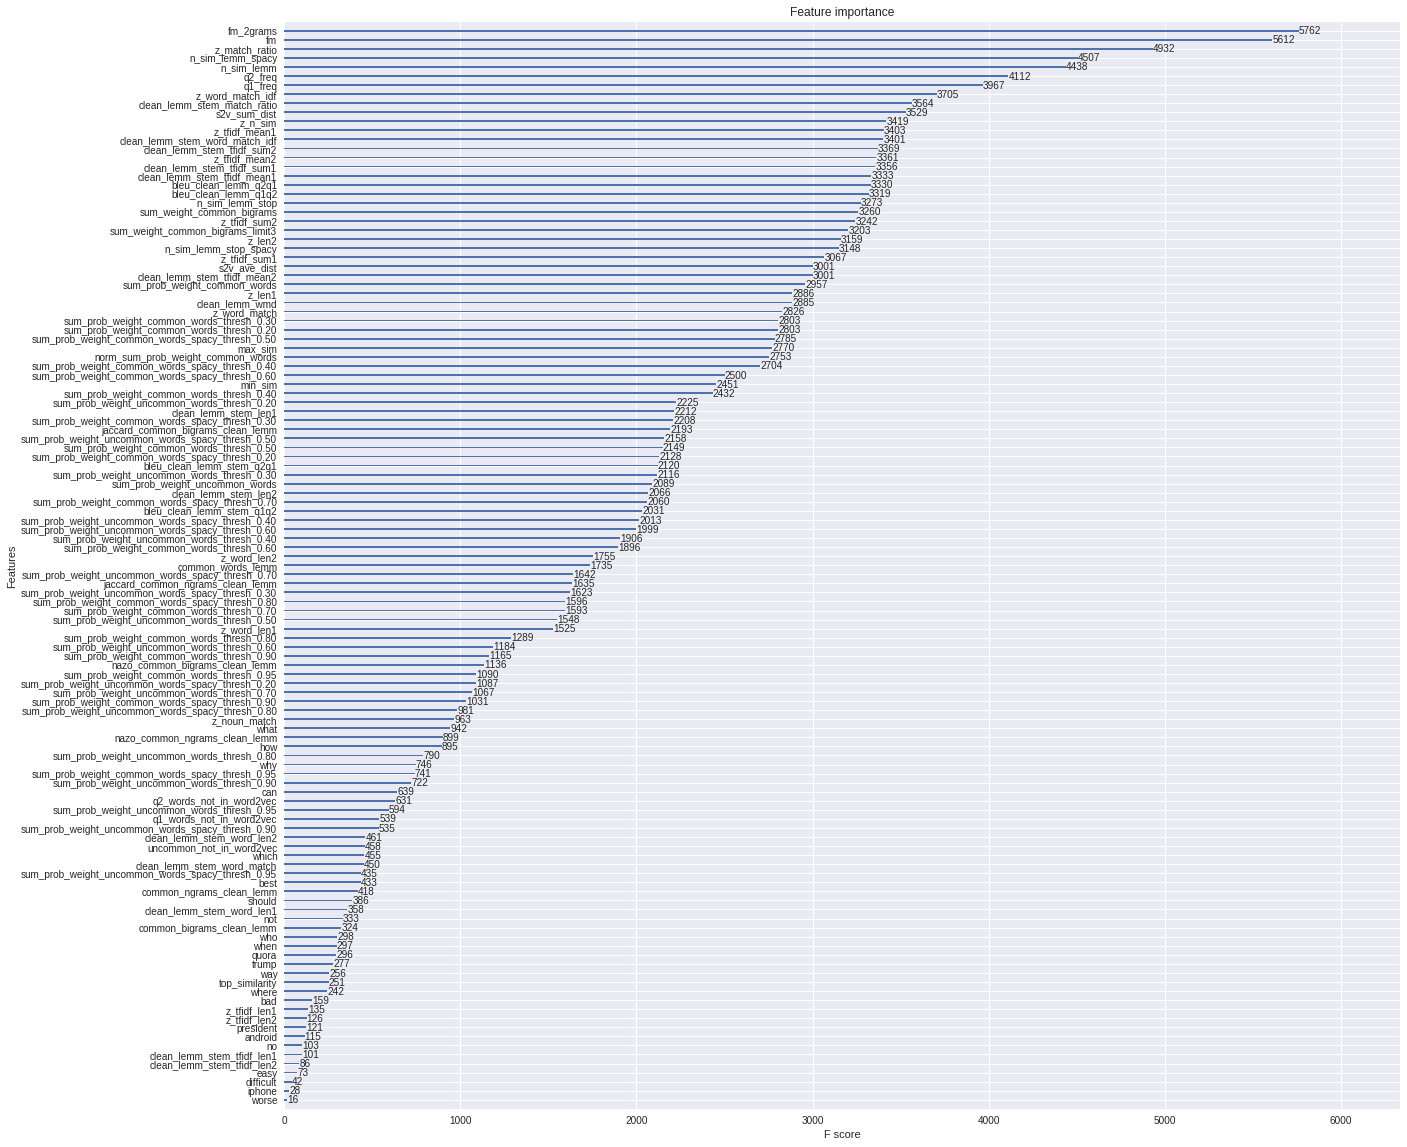

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 20.0)
xgb.plot_importance(bst); plt.show()

In [12]:
test = read_data('test', features)#[:100]
sub = pd.DataFrame()
sub['test_id'] = test['test_id']
sub['is_duplicate'] = bst.predict(xgb.DMatrix(test[features]))

sub.to_csv('result.csv', index=False)

In [13]:
ori_train_pred = bst.predict(xgb.DMatrix(train[features]))
ori_train_bin_pred = np.where(ori_train_pred < 0.5, 0, 1)
print('accuracy: {}'.format(sum(train.is_duplicate == ori_train_bin_pred) / len(train)))

accuracy: 0.9085112171955775


In [14]:
# train_pred = bst.predict(xgb.DMatrix(split_train[features]))
# train_bin_pred = np.where(train_pred < 0.5, 0, 1)
# print('accuracy: {}'.format(sum(split_train.is_duplicate == train_bin_pred) / len(split_train)))

In [15]:
valid_pred = bst.predict(xgb.DMatrix(split_valid[features]))
valid_bin_pred = np.where(valid_pred < 0.5, 0, 1)
print('accuracy: {}'.format(sum(split_valid.is_duplicate == valid_bin_pred) / len(split_valid)))

accuracy: 0.8514185361992629


In [16]:
train['pred'] = ori_train_pred

def calc_score(row):
    return log_loss([row['is_duplicate']], [row['pred']], labels=[0, 1])

train['loss'] = train.apply(calc_score, axis=1)

In [17]:
text_features = [
    'q1_tokenized',
    'q2_tokenized',
    'question1_nouns',
    'question2_nouns',
    'q1_lemmatized',
    'q2_lemmatized',
    'q1_pos_tagged',
    'q2_pos_tagged',
    'clean_q1_lemmatized_stem',
    'clean_q2_lemmatized_stem',
    'clean_q1_lemmatized',
    'clean_q2_lemmatized',
]

text_features_train = read_feature('train', text_features)

In [18]:
data = pd.merge(train, text_features_train, how='outer')

In [19]:
data.to_pickle('train_with_pred.pkl')

In [20]:
pd.set_option("display.max_colwidth", -1)
pd.set_option("display.max_rows", 101)

In [21]:
data.sort_values(by='loss', ascending=False)[:1000].to_html('gao.html')

In [22]:
analysis_features = [
    'id',
    'question1',
    'question2',
    'is_duplicate',
    'pred',
    'loss',
    'q1_lemmatized',
    'q2_lemmatized',
    'clean_q1_lemmatized_stem',
    'clean_q2_lemmatized_stem',
    'question1_nouns',
    'question2_nouns',
    
    'sum_prob_weight_common_words',
    'norm_sum_prob_weight_common_words',
#     'sum_prob_weight_common_words_thresh_0.80',
#     'sum_prob_weight_uncommon_words_thresh_0.80',
    'n_sim_lemm',
    'n_sim_lemm_spacy',
    'z_match_ratio',
    'z_word_match_idf',
    'clean_lemm_wmd',
]

In [23]:
data[analysis_features].sort_values(by='loss', ascending=False)[data.is_duplicate == 1][:1000].to_html('gaoo.html')

/home/takaya/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [24]:
#data[data['question1'].str.contains('trump', regex=False)][analysis_features].to_html('gaogao2.html')#[analysis_features]

In [25]:
n = int(len(data) * 0.01)
print('{} / {}'.format(n, len(data)))
data.loss.sort_values(ascending=False)[:n].sum() / data.loss.sum()

4042 / 404290


0.13150786025730066

In [26]:
selected_ids = [
    15618,
    155917,
    149163,
]
data[data.id.isin(selected_ids)][analysis_features]

,id,question1,question2,is_duplicate,pred,loss,q1_lemmatized,q2_lemmatized,clean_q1_lemmatized_stem,clean_q2_lemmatized_stem,question1_nouns,question2_nouns,sum_prob_weight_common_words,norm_sum_prob_weight_common_words,n_sim_lemm,n_sim_lemm_spacy,z_match_ratio,z_word_match_idf,clean_lemm_wmd
15618,15618,What is the best TV Series in Hindi? Why?,What is the best TV series in India? Why?,1,0.045386,3.092561,"[what, be, the, best, tv, series, in, hindi, ?, why, ?]","[what, be, the, best, tv, series, in, india, ?, why, ?]","[best, tv, seri, hindi]","[best, tv, seri, india]","[tv, series, hindi]","[tv, series]",2.913671,0.374055,0.915400,0.973321,0.975610,1.0,1.037867
149163,149163,Which is the best book for learning c for novice?,Which is the best book for learning C for Beginners?,1,0.242070,1.418529,"[which, be, the, best, book, for, learn, c, for, novice, ?]","[which, be, the, best, book, for, learn, c, for, beginner, ?]","[best, book, learn, c, novic]","[best, book, learn, c, beginn]","[book, c, novice]","[book, c, beginners]",3.877748,0.397577,0.952954,0.993146,0.891089,1.0,0.616909
155917,155917,Does Tesco have any corporate governance issue?,Does Tesco have any corporate governance problems?,1,0.140998,1.959009,"[do, tesco, have, any, corporate, governance, issue, ?]","[do, tesco, have, any, corporate, governance, problem, ?]","[tesco, corpor, govern, issu]","[tesco, corpor, govern, problem]","[tesco, governance, issue]","[tesco, governance, problems]",2.994304,0.375132,0.960019,0.984886,0.886598,1.0,0.599685
